## Chapter 06. 概率
**本书对概率内容只是简单提及了一些重要的知识点，具体参考相关概率书籍。--by alex, 2017/12/06**

我们把概率论视为对从事件空间中抽取的事件的不确定性进行量化的一种方式。

我们暂且不探究术语的技术内涵，而是用掷骰子的例子来理解它们。空间是指所有可能的结果的集合。这些结果的任何一部分就是一个事件，比如，“骰子掷出的点数为1”、“骰子掷出的点数是偶数”等都是事件。

我们用$P(E)$来标记“事件$E$的概率”。

### 6.1 不独立和独立
泛泛地讲，如果$E$发生意味着$F$发生（或者$F$发生意味着$E$发生），我们就称事件$E$与事件$F$为不相互独立（dependent）。反之，$E$与$F$就相互独立（independent）。

从数学角度讲，事件$E$和事件$F$独立意味着两个事件同时发生的概率等于它们分别发生的概率的乘积：
> $P(E, F)=P(E)P(F)$

### 6.2 条件概率
如果事件E与事件F独立，那么定义式如下：
> $P(E, F) = P(E)P(F)$

如果两者不一定独立（并且F的概率不为零），那么E关于F的条件概率式如下（条件概率可以理解为，已知F发生的情况下，E会发生的概率）：
> - $P(E|F)=\frac{P(E, F)}{P(F)}$
> - $P(E, F) = P(E|F)P(F)$

如果E和F独立，则F是否发生并不会影响E是否发生的概率：
> $P(E|F)=P(E)$

举一个常见的关于一个有两个孩子（性别未知）的家庭的有趣例子。如果我们假设：
1. 每个孩子是男孩和是女孩的概率相同
2. 第二个孩子的性别概率与第一个孩子的性别概率独立

那么，事件“没有女孩”的概率是1/4，事件“一个男孩，一个女孩”的概率为1/2，事件“两个女孩”的概率为1/4。

**问题1：事件B“两个孩子都是女孩”关于事件 G“大孩子是女孩”的条件概率是多少？**
用条件概率的定义式进行计算如下：
$P(B|G)=\frac{P(B,G)}{P(G)} = \frac{P(B)}{P(G)} = \frac{1}{2}$
，事件B与G的交集（“两个孩子都是女孩并且大孩子是女孩”）刚好是事件B本身。

**问题2：事件B“两个孩子都是女孩”关于事件“至少一个孩子是女孩”(L)的条件概率是多少？**
使用条件概率公式计算：$P(B|L) = \frac{P(B,L)}{P(L)} = \frac{P(B)}{P(L)} = \frac{1}{3}$

我们可以通过“生成”许多家庭来验证这个结论：

In [3]:
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(both | older):", both_girls / older_girl) # 0.514 ~ 1/2
print("P(both | either): ", both_girls / either_girl) # 0.342 ~ 1/3

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


### 6.3 贝叶斯定理
假设我们需要计算事件E基于已发生的事件F的条件概率，但我们已知的条件仅仅是事件F基于已发生的事件E的条件概率。两次利用条件概率的定义，可以得到下式：
> $P(E|F) = \frac{P(E, F)}{P(F)} = \frac{P(F|E)P(E)}{P(F)}$

参考：《写给程序员的数据挖掘实践指南》第6、7章

### 6.4 随机变量
随机变量指这样一种变量，其可能的取值有一种联合概率分布。定义一个简单的随机变量：掷起一枚硬币，如果正面朝上，随机变量等于1；如果背面朝上，随机变量等于0。可以再定义更复杂些的随机变量，如掷起一枚硬币10次，查看正面朝上的次数，或者从range(10)取出的一个值，每个数值被取到的可能性都相等。

联合分布对变量实现每种可能值都赋予了概率。通过掷硬币得到的随机变量等于0的概率为0.5， 等于1的概率也为0.5。从range(10)中生成随机变量的分布为从0到9之间的每个数值赋予0.1的概率。

我们有时会讨论一个随机变量的期望值，表示这个随机变量可能值的概率加权值。掷硬币随机变量的期望值为1/2(=0＊1/2 + 1＊1/2)，而range(10)随机变量的期望值为4.5。

随机变量也可以基于某些条件事件产生，就像其他事件一样。回忆“条件概率”中提到的双生子例子：如果X是表示女孩个数的随机变量，那么X等于0的概率为1/4 ，等于1的概率为1/2，等于2的概率为1/4。

### 6.5 连续分布
掷硬币对应的是离散分布（discrete distribution）——对离散的结果赋予正概率。我们常常希望对连续结果的分布进行建模。例如，均匀分布（uniform distribution）函数对0到1之间的所有值都赋予相同的权重（weight）。

因为0和1之间有无数个数字，因而对每个点而言，赋予的权重几乎是零。因此，我们用概率密度函数（probability density function，pdf）的连续分布来表示概率，一个变量位于某个区间的概率等于概率密度函数在这个区间上的积分。
> 如果积分运算不直观，有一种更简单的理解方式：一个分布的密度函数为f，如果h很小，则变量的值落在x与x+h之间的概率接近h*f(x)。

- PDF，是概率密度函数，描述可能性的变化情况，如正态分布密度函数，在中间出现的情况最大，两端出现的情况较小。
- CDF,是分布函数，描述发生某事件概率。任何一个CDF，是一个不减函数，最终等于1.上面的pdf描述了CDF的变化趋势，即曲线的斜率。

我理解的是，我们最终目的是算概率，而算概率需要CDF，要了解CDF你就得知道PDF的情况，否则就很难入手。

In [4]:
# 均匀分布的密度函数
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

# 均匀分布的累积分布函数
def uniform_cdf(x):
    "returns the probability that a uniform random variable is less than x"
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X < 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1

均匀分布的累积分布函数：
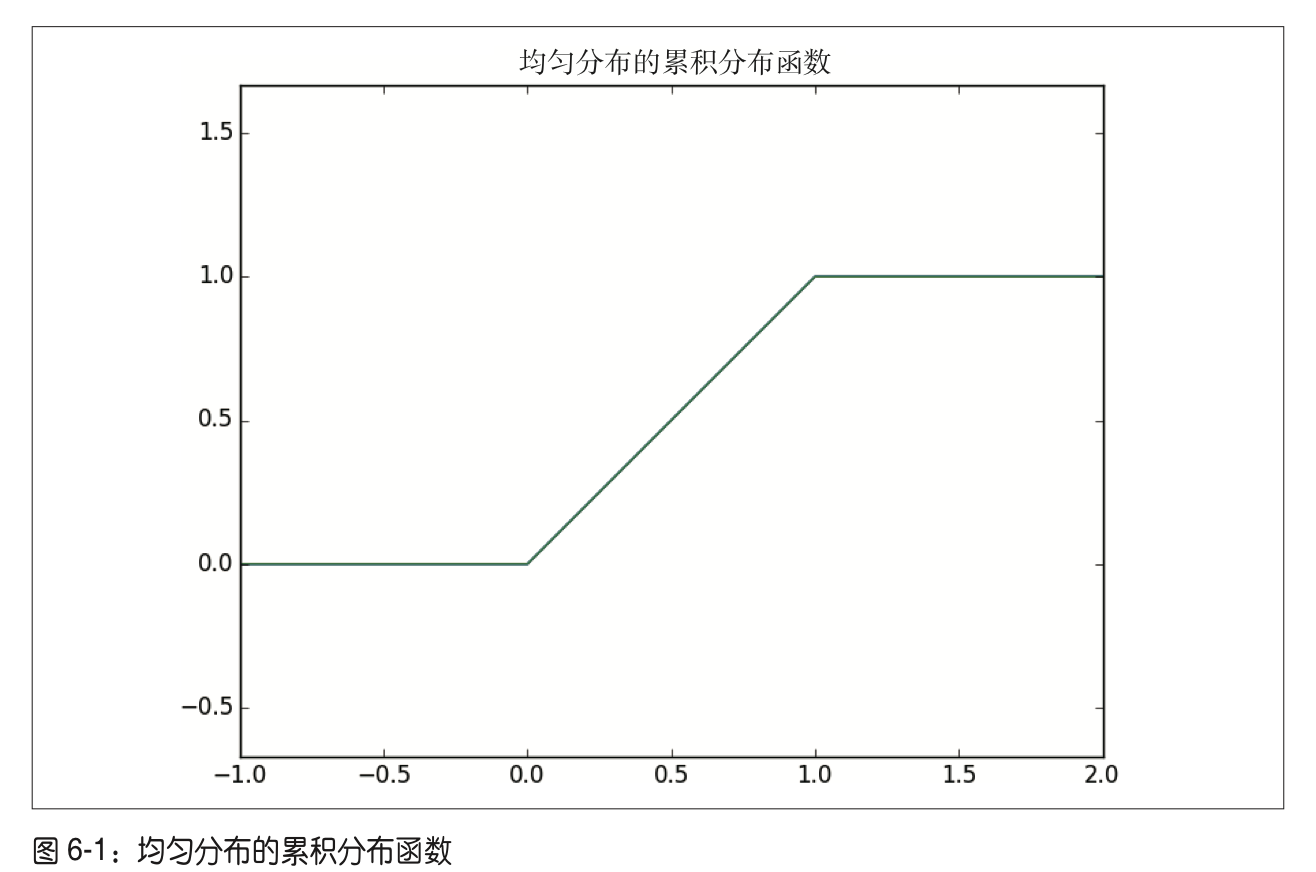

### 6.6 正态分布
正态分布是分布之王！它是典型的钟型曲线形态分布函数，可以完全由两个参数决定：均值$\mu$和标准差$\sigma$。 均值描述钟型曲线的中心，标准差描述曲线有多“宽”。

正态分布的分布函数如下：
> $f(x|\mu \sigma) = \frac{1}{\sqrt{2\pi}}exp\lgroup -\frac{(x-\mu)^2}{2\sigma^2} \rgroup$

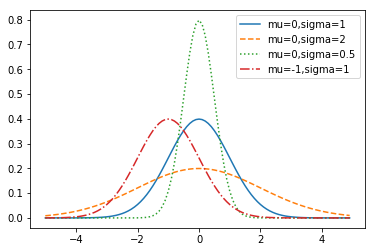

In [5]:
import matplotlib.pyplot as plt
import math

# 正态分布的密度函数
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

# 正态分布的累积分布函数
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

# 绘制正态分布曲线
def plot_normal_pdfs():
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend()
    plt.show()
    
# 绘制正态分布的累积分布曲线
def plot_normal_cdfs():
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4) # bottom right
    plt.show()

plot_normal_pdfs()

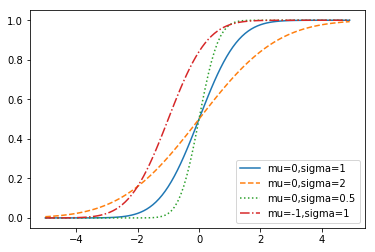

In [6]:
plot_normal_cdfs()

In [7]:
normal_pdf(0), normal_pdf(1),normal_pdf(2)

(0.3989422804014327, 0.24197072451914337, 0.05399096651318806)

In [8]:
normal_cdf(0), normal_cdf(1), normal_cdf(2)

(0.5, 0.841344746068543, 0.9772498680518207)

In [8]:
# 累积分布曲线求逆
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

这个函数反复分割区间，直到分割到一个足够接近于期望概率的精细的$Z$值。

In [10]:
inverse_normal_cdf(0.5), inverse_normal_cdf(0.841344746068543), inverse_normal_cdf(0.9772498680518207)

(0.0, 0.9999942779541016, 1.9999980926513672)

### 6.7 中心极限定理
正态分布的运用如此广泛，很大程度上归功于中心极限定理（central limit theorem） 。这个定理说，一个定义为大量独立同分布的随机变量的均值的随机变量本身就是接近于正态分布的。

参考：http://www.jianshu.com/p/cb7145e4c4bd

特别地，如果$x_1, x_2, …, x_n$都是均值为$\mu$、标准差为$\sigma$的随机变量，且$n$很大，那么：
$\frac{1}{n}(x_1, x_2, …, x_n)$
近似正态分布，且均值为$\mu$，标准差为$\frac{\sigma}{\sqrt{n}}$。等价于（其实更常用）：
$\frac{(x_1, x_2, …, x_n)-\mu m}{\sigma\sqrt{n}}$
上式近似正态分布，均值为0，标准差为1.

举一个易于理解的验证例子——带有$n$和$p$两个参数的二项式随机变量。一个二项式随机变量$Binonimal(n,p)$是$n$个独立伯努利随机变量$Bernoulli(p)$之和，每个伯努利随机变量等于$1$的概率是$p$，等于$0$的概率是$1-p$：

In [ ]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

每个伯努利随机变量$Bernoulli(p)$的均值为$p$，标准差为$\sqrt{p(1-p)}$。根据中心极限定理，当$n$变得很大，一个二项式随机变量$ Binonimal(n,p)$近似于一个正态分布的随机变量，其中均值为$\mu=np$，标准差为$\sigma = \sqrt{np(1-p)}$。如果把两个分布都在图上绘出来，很容易看出相似性：

In [ ]:
import math, random
from collections import Counter

def make_hist(p, n, num_points):
    data = [binomial(p, n) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.show()

make_hist(0.75, 100, 10000)